- step1: Get raw video and extract information

In [3]:
# Read video in the folder data/raw_videos/kaggle

import os
import sys

sys.path.append(os.path.abspath(".."))

from src.preprocessing.video_loader import VideoLoader

video_folder = "../data/raw_videos/kaggle"
video_path = os.path.join(video_folder,"100.mp4")

# use a video loader object to get the video info
vid_loader = VideoLoader(video_path)
print(vid_loader.get_video_info())

{'video': '../data/raw_videos/kaggle/100.mp4', 'fps': 25.0, 'frame_count': 1855, 'duration': 74.2, 'resolution': '1280x720'}


- step2: extract frames 

Starting extraction from 0m to endm...
Targeting 10 FPS, max 1000 frames.


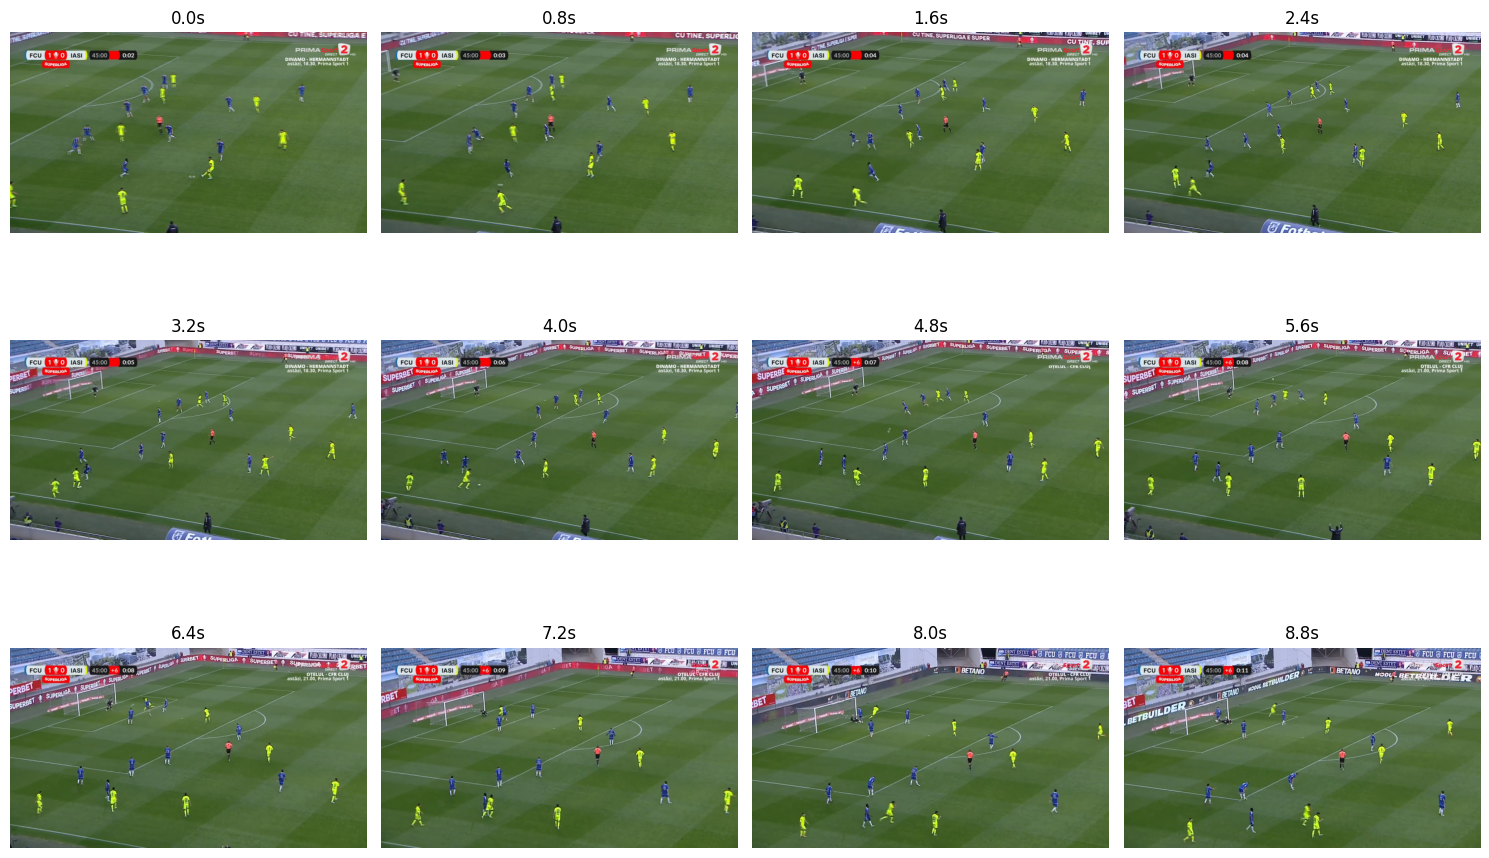

Extraction Summary:
  Saved: 304
  Skipped (Blurry): 0
  Skipped (No Pitch): 183
  Skipped (Transition): 441
Saved frames to /home/tsegaye/Desktop/projects/football_data/data/interim/frames


['/home/tsegaye/Desktop/projects/football_data/data/interim/frames/frame_000303_sec_74.16.jpg',
 {'saved': 304,
  'blurry_skipped': 0,
  'crowd_skipped': 183,
  'transition_skipped': 441}]

In [4]:
from src.preprocessing.frame_extractor import FrameExtractor

frame_extractor = FrameExtractor(vid_loader)
frame_extractor.extract_frames(display=True)